In [6]:
!pip install -q tensorflow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 644.9/644.9 MB 742.5 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.5/57.5 kB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.5/24.5 MB 81.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 319.9/319.9 kB 21.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 115.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.1/5.1 MB 112.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.6/6.6 MB 108.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.5/224.5 kB 16.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.5/72.5 kB 6.0 MB/s eta 0:00:00


In [7]:
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import tensorflow as tf

import numpy as np

import seaborn as sns

import pandas as pd

In [8]:
tf.__version__

'2.19.0'

In [9]:
%load_ext tensorboard

In [10]:
logdir='log'

In [11]:
(train_images, train_labels), (test_images, test_labels) = datasets.mnist.load_data()

train_images = train_images.reshape((60000, 28, 28, 1))
test_images = test_images.reshape((10000, 28, 28, 1))

train_images, test_images = train_images / 255.0, test_images / 255.0

classes=[0,1,2,3,4,5,6,7,8,9]

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [12]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [13]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(logdir, histogram_freq=1)

In [14]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(x=train_images,
            y=train_labels,
            epochs=5,
            validation_data=(test_images, test_labels))

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 40s 20ms/step - accuracy: 0.8957 - loss: 0.3356 - val_accuracy: 0.9864 - val_loss: 0.0402
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 39s 21ms/step - accuracy: 0.9857 - loss: 0.0472 - val_accuracy: 0.9886 - val_loss: 0.0367
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 37s 20ms/step - accuracy: 0.9892 - loss: 0.0331 - val_accuracy: 0.9879 - val_loss: 0.0405
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 35s 19ms/step - accuracy: 0.9917 - loss: 0.0266 - val_accuracy: 0.9906 - val_loss: 0.0298
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 35s 19ms/step - accuracy: 0.9943 - loss: 0.0178 - val_accuracy: 0.9895 - val_loss: 0.0358


In [16]:
y_true=test_labels
y_prob = model.predict(test_images)
y_pred = np.argmax(y_prob, axis=1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step


In [17]:
classes=[0,1,2,3,4,5,6,7,8,9]

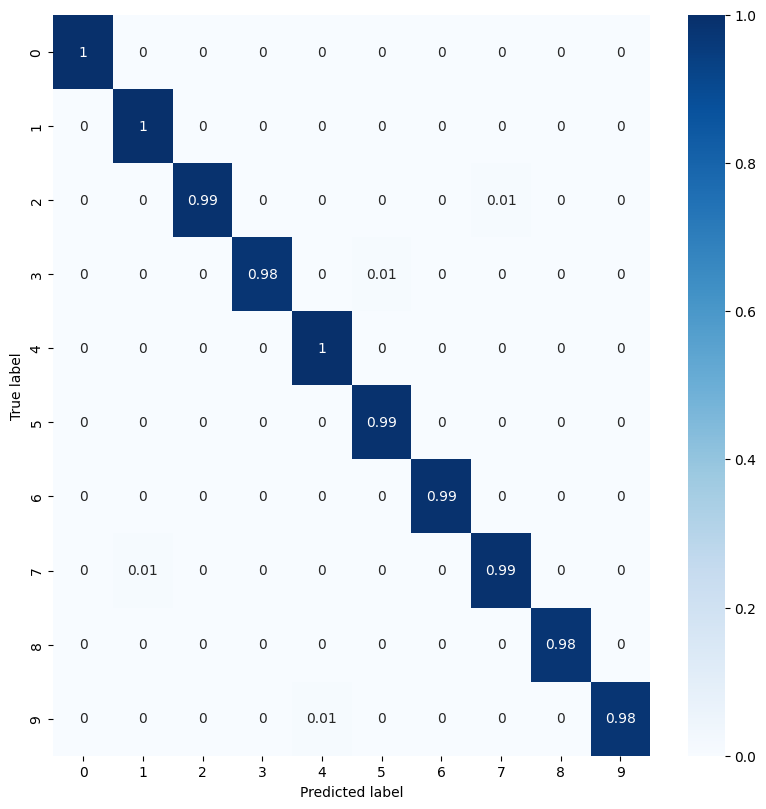

In [18]:
con_mat = tf.math.confusion_matrix(labels=y_true, predictions=y_pred).numpy()
con_mat_norm = np.around(con_mat.astype('float') / con_mat.sum(axis=1)[:, np.newaxis], decimals=2)

con_mat_df = pd.DataFrame(con_mat_norm,
                     index = classes,
                     columns = classes)

figure = plt.figure(figsize=(8, 8))
sns.heatmap(con_mat_df, annot=True,cmap=plt.cm.Blues)
plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

In [25]:
# Metricas

num_classes = con_mat.shape[0]
total = np.sum(con_mat)

accuracias = []
precisoes = []
especificidades = []
recalls = []
f1s = []

for i in range(num_classes):
    TP = con_mat[i, i]
    FP = np.sum(con_mat[:, i]) - TP
    FN = np.sum(con_mat[i, :]) - TP
    TN = total - (TP + FP + FN)

    # Acuracia
    acc_i = (TP + TN) / total
    accuracias.append(acc_i)

    # Precisao
    if TP + FP == 0:
        prec_i = 0.0
    else:
        prec_i = TP / (TP + FP)
    precisoes.append(prec_i)

    # Especificidade
    if (TN + FP) == 0:
        spec_i = 0.0
    else:
        spec_i = TN / (TN + FP)
    especificidades.append(spec_i)

    # Sensibilidade (Recall)
    if TP + FN == 0:
        rec_i = 0.0
    else:
        rec_i = TP / (TP + FN)
    recalls.append(rec_i)

    # F1-Score
    if prec_i + rec_i == 0:
        f1_i = 0.0
    else:
        f1_i = 2 * prec_i * rec_i / (prec_i + rec_i)
    f1s.append(f1_i)

    print(f"Classe {i}:")
    print(f"TP = {TP}")
    print(f"FP = {FP}")
    print(f"FN = {FN}")
    print(f"TN = {TN}")
    print(f"Acuracia   = {acc_i:.4f}")
    print(f"Precisao   = {prec_i:.4f}")
    print(f"Especificidade   = {spec_i:.4f}")
    print(f"Sensibilidade = {rec_i:.4f}")
    print(f"F1-score   = {f1_i:.4f}\n")


# Acuracia geral
accuracia_total = np.trace(con_mat) / total
print(f"Acurácia total: {accuracia_total:.4f}")

# Macro Medias
precisao_macro = np.mean(precisoes)
especificidade_macro = np.mean(especificidades)
recall_macro = np.mean(recalls)
f1_macro = np.mean(f1s)


print("\nMedia Macro:")
print(f"Precisao media: {precisao_macro:.4f}")
print(f"Especificidade média (macro): {especificidade_macro:.4f}")
print(f"Sensibilidade media: {recall_macro:.4f}")
print(f"F1-score medio: {f1_macro:.4f}")

# OBS:
# A Curva ROC é feita para decisões binárias, por isso não faz sentido para este exercicio de Multiclasses

Classe 0:
TP = 976
FP = 8
FN = 4
TN = 9012
Acuracia   = 0.9988
Precisao   = 0.9919
Especificidade   = 0.9991
Sensibilidade = 0.9959
F1-score   = 0.9939

Classe 1:
TP = 1132
FP = 10
FN = 3
TN = 8855
Acuracia   = 0.9987
Precisao   = 0.9912
Especificidade   = 0.9989
Sensibilidade = 0.9974
F1-score   = 0.9943

Classe 2:
TP = 1022
FP = 8
FN = 10
TN = 8960
Acuracia   = 0.9982
Precisao   = 0.9922
Especificidade   = 0.9991
Sensibilidade = 0.9903
F1-score   = 0.9913

Classe 3:
TP = 988
FP = 2
FN = 22
TN = 8988
Acuracia   = 0.9976
Precisao   = 0.9980
Especificidade   = 0.9998
Sensibilidade = 0.9782
F1-score   = 0.9880

Classe 4:
TP = 978
FP = 11
FN = 4
TN = 9007
Acuracia   = 0.9985
Precisao   = 0.9889
Especificidade   = 0.9988
Sensibilidade = 0.9959
F1-score   = 0.9924

Classe 5:
TP = 881
FP = 22
FN = 11
TN = 9086
Acuracia   = 0.9967
Precisao   = 0.9756
Especificidade   = 0.9976
Sensibilidade = 0.9877
F1-score   = 0.9816

Classe 6:
TP = 953
FP = 10
FN = 5
TN = 9032
Acuracia   = 0.9985
Precisao  

In [ ]:
model1 = models.Sequential()
model1.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model1.add(layers.MaxPooling2D((2, 2)))
model1.add(layers.Conv2D(64, (3, 3), activation='relu'))
model1.add(layers.MaxPooling2D((2, 2)))
model1.add(layers.Conv2D(64, (3, 3), activation='relu'))

model1.add(layers.Flatten())
model1.add(layers.Dense(64, activation='relu'))
model1.add(layers.Dense(10, activation='softmax'))

model1.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [ ]:
file_writer = tf.summary.create_file_writer(logdir + '/cm')

def log_confusion_matrix(epoch, logs):
  # Use the model to predict the values from the validation dataset.
  test_pred = model1.predict_classes(test_images)

  con_mat = tf.math.confusion_matrix(labels=test_labels, predictions=test_pred).numpy()
  con_mat_norm = np.around(con_mat.astype('float') / con_mat.sum(axis=1)[:, np.newaxis], decimals=2)

  con_mat_df = pd.DataFrame(con_mat_norm,
                     index = classes,
                     columns = classes)

  figure = plt.figure(figsize=(8, 8))
  sns.heatmap(con_mat_df, annot=True,cmap=plt.cm.Blues)
  plt.tight_layout()
  plt.ylabel('True label')
  plt.xlabel('Predicted label')

  buf = io.BytesIO()
  plt.savefig(buf, format='png')

  plt.close(figure)
  buf.seek(0)
  image = tf.image.decode_png(buf.getvalue(), channels=4)

  image = tf.expand_dims(image, 0)

  # Log the confusion matrix as an image summary.
  with file_writer.as_default():
    tf.summary.image("Confusion Matrix", image, step=epoch)


logdir='logs/images'

tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

cm_callback = keras.callbacks.LambdaCallback(on_epoch_end=log_confusion_matrix)

In [ ]:
model1.fit(
    train_images,
    train_labels,
    epochs=5,
    verbose=0,
    callbacks=[tensorboard_callback, cm_callback],
    validation_data=(test_images, test_labels),
)

In [ ]:
# Start TensorBoard.
%tensorboard --logdir logs/images